## **Wine Dataset**

In [1]:
#Imported_libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import random
import pylab
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from matplotlib.cbook import get_sample_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Image

# 1. Representation Learning

### Importing and Preprocessing

In [2]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')
white_wine= white_wine.copy()
white_wine[C]= np.zeros(white_wine.shape[0])
red_wine[C]= np.ones(red_wine.shape[0])
wine = pd.concat([white_wine,red_wine])
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


In [3]:
print(wine.nunique())
print(wine.quality.unique())

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
dtype: int64
[6 5 7 8 4 3 9]


After importing the Red and White Wine datasets, concatenating them to one DataFrame and viewing its info, we can see at a quick glance that there are no missing data, and that all data is numerical. The 'nunique' function shows us that *color* is a categorical data with two unique entries (0 for white wine and 1 for red wine). 

We will drop this feature because certain analysis, such as PCA, do not work well with categorical data. Although it is possible to apply PCA on categorical data, even after it has been one hot encoded, it is not good practice. PCA is a rotation of data from one coordinate system to another. So, since categorical data does not technically belong on a coordinate plane, it is better to not apply PCA on it. The reason why we drop this feature from the entire dataset because of PCA is for consistancy. We do keep in mind this may affect accuracies of some classification but it is a trade-off we will take in this case.

The 'unique' function also helps us take a look at the other categorical data which is our class feature, *Quality*. It has 7 unique options: [6 5 7 8 4 3 9]. We will remove this column as this will be the target column for classification.

Finally, we will do Min-Max Normalization on the remaining data. Although Z-Score may mroe commonly be preferred, in this case we use Min-Max so as to keep all our values positive (since some classifiers will not work with negative values, and we want to keep a consistant normalization of data throughout the assignment. 

In [4]:
wine2=wine.copy()
wine2=wine.drop(columns=['quality','color'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(wine2)

wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


Before proceeding, we will create an array of all the extracted features (which includes everything the dataset excluding *quality*, called Extracted_Features which consists of the remaining 11 features

And we will also put *quality* into a dataframe called target to be used later in the assignment.

In [5]:
Extracted_features = wine2.loc[:].values 
L=['quality']
target_=wine[L]
target=target_.reset_index()
target=target.drop(['index'],axis=1) 

Lastly, we will split the Extracted features into the Train/Validation set which contains 80% of the data, and the Test data which contains the remaining 20%. We min-max normalize the train/valididation set using fit_transform and the test set using transform.

Lastly, the target feature (which is our class Rings in this case)'s test and train set is manipulated to reset its index in ascending order and drop the index column for simplicity. Note that we do not normalize the target 

In [6]:
x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)
scalar.fit_transform(x_train)
scalar.transform(x_test)

target_training_set_=y_train.reset_index()
target_training_set=target_training_set_.drop(['index'],axis=1)
target_test_set_=y_test.reset_index()
target_test_set=target_test_set_.drop(['index'],axis=1)

### 1. Produce a plot of the data in the two lowest dimensions for PCA and LDA, using easily distinguishable colours and markers to indicate the labels of each datapoint. Also use the t-SNE method to produce a 2D plot of the datasets. You now have three 2-dimensional plots of each dataset. Comment briefly on any interesting patterns that emerge.

Now, we will carry out Principal Component Analysis on the data with 2 dimensions to create a 2D plot of the datasets. The PCA model is fit on the the normalized train/validation set with fit_transform and on the normalized test set with transform. 

The train/validation and test PCA models are then placed in dataframes, to which we append their respective class labels from the target and make sure to label all the columns correctly. 

Finally the two dataframes train/validation and test are joined to give us the final PCA_Wine_df DataFrame

In [7]:
pca=PCA(n_components=2)
PCA_train=pca.fit_transform(x_train)
PCA_test=pca.transform(x_test)

PCA_wine_df1=pd.DataFrame(data=PCA_train,columns=['PCA1','PCA2'])
PCA_wine_df2=pd.DataFrame(data=PCA_test,columns=['PCA1','PCA2'])

PCA_wine_df1_train_whole=pd.DataFrame.join(self=PCA_wine_df1,other=target_training_set)
PCA_wine_df1_test_whole=pd.DataFrame.join(self=PCA_wine_df2,other=target_test_set)

PCA_wine_df=pd.concat([PCA_wine_df1_train_whole,PCA_wine_df1_test_whole])
PCA_wine_df.head()

,PCA1,PCA2,quality
0,-0.066459,0.255330,6
1,0.360431,-0.208013,6
2,0.114482,0.469383,6
3,-0.131951,-0.036596,6
4,-0.223648,-0.120652,6


To visualize this feature extraction, we can plot the 2D graph:

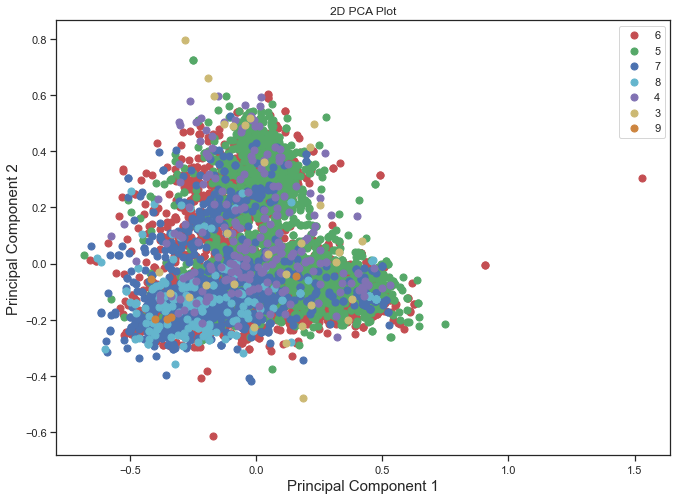

In [8]:
figure = plt.figure(figsize = (11,8))
ax = figure.add_subplot(1,1,1)
ax.set_title('2D PCA Plot')
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_xlabel('Principal Component 1', fontsize = 15)
target3=[6, 5, 7, 8, 4, 3, 9]
colors = ['r','g','b','c','m','y','peru']
for target3, color in zip(target3, colors):
    indicesTokeep = PCA_wine_df['quality'] == target3
    ax.scatter(PCA_wine_df.loc[indicesTokeep, 'PCA1'] , 
               PCA_wine_df.loc[indicesTokeep, 'PCA2'],
               c = color,s=50,label=target3)
ax.legend()

From the graph above, it does not appear to be that PCA of dimension 2 gave us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of quality) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate

Now, we will carry out LDA on the dataset again in just two dimensions and plot a graph to help us visualize

In [9]:
lda=LinearDiscriminantAnalysis(n_components=2)

LDA_train=lda.fit(x_train,y_train).transform(x_train)
LDA_test=lda.transform(x_test)

LDA_wine_df1=pd.DataFrame(data=LDA_train,columns=['LDA1','LDA2'])
LDA_wine_df2=pd.DataFrame(data=LDA_test,columns=['LDA1','LDA2'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(LDA_wine_df1)
scalar.transform(LDA_wine_df2)

LDA_wine_df1_train_whole=pd.DataFrame.join(self=LDA_wine_df1,other=target_training_set)
LDA_wine_df1_test_whole=pd.DataFrame.join(self=LDA_wine_df2,other=target_test_set)

LDA_wine_df=pd.concat([LDA_wine_df1_train_whole,LDA_wine_df1_test_whole])
LDA_wine_df.head()

,LDA1,LDA2,quality
0,0.542160,0.541375,6
1,0.554502,0.590632,6
2,0.344859,0.481567,6
3,0.546633,0.581380,6
4,0.802614,0.577779,6


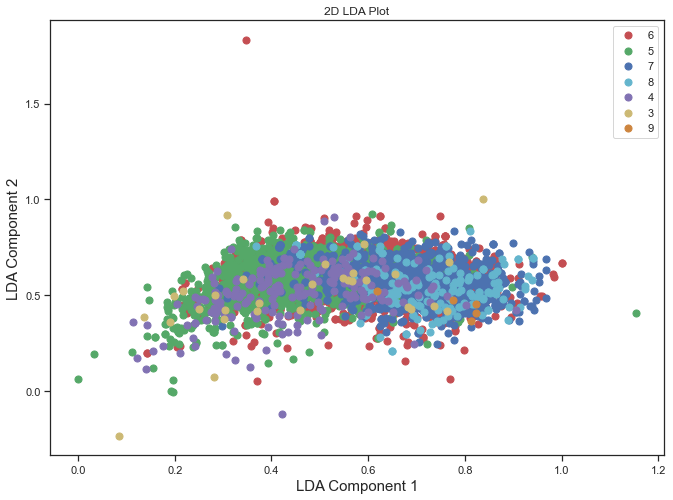

In [10]:
figure = plt.figure(figsize = (11,8))
ax = figure.add_subplot(1,1,1)
ax.set_title('2D LDA Plot')
ax.set_ylabel('LDA Component 2', fontsize = 15)
ax.set_xlabel('LDA Component 1', fontsize = 15)
target2=[6, 5, 7, 8, 4, 3, 9]
colors = ['r','g','b','c','m','y','peru']
for target2, color in zip(target2, colors):
    indicesTokeep = LDA_wine_df['quality'] == target2
    ax.scatter(LDA_wine_df.loc[indicesTokeep, 'LDA1'] , 
               LDA_wine_df.loc[indicesTokeep, 'LDA2'],
               c = color,s=50,label=target2)
    ax.legend()

The LDA plot compared to PCA seems to be a closer cluster of points. However, we still observe that LDA of dimension 2 did not give us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of quality) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate

Lastly, we will carry out TSNE Analysis again on 2 dimensions and take a look at the produced 2-D graph

In [11]:
tsne=TSNE(n_components=2).fit_transform(Extracted_features)
TSNE_wine_df1=pd.DataFrame(data=tsne,columns=['TSNE1','TSNE2'])
scalar.fit_transform(TSNE_wine_df1)
TSNE_wine_df=pd.DataFrame.join(self=TSNE_wine_df1,other=target)
TSNE_wine_df.head()

,TSNE1,TSNE2,quality
0,0.444698,0.984897,6
1,0.315841,0.507350,6
2,0.616395,0.687498,6
3,0.389442,0.767332,6
4,0.389442,0.767332,6


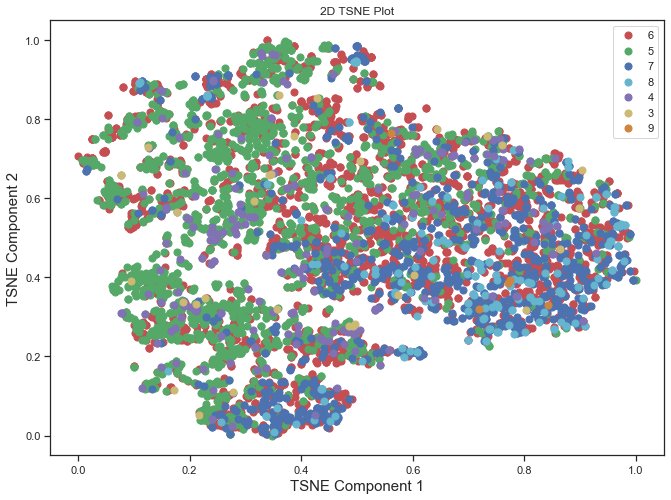

In [12]:
figure = plt.figure(figsize = (11,8))
ax = figure.add_subplot(1,1,1)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_title('2D TSNE Plot')
target2=[6, 5, 7, 8, 4, 3, 9]
colors = ['r','g','b','c','m','y','peru']
for target2, color in zip(target2, colors):
    indicesTokeep = TSNE_wine_df['quality'] == target2
    ax.scatter(TSNE_wine_df.loc[indicesTokeep, 'TSNE1'] , 
               TSNE_wine_df.loc[indicesTokeep, 'TSNE2'],
               c = color,s=50,label=target2)
ax.legend()

The TSNE plot has a completely different shape to the PCA and LDA graphs, but yet again, the TSNE classifier of dimension 2 did not give us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of quality) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate


### 2. (PCA Only) Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.

A Scree plot is plotted to display how much variation each principal component in a PCA analysis captures from the data. To best see the plot, we can use all the 11 features for the principal component to accurately view all of their contributions. 

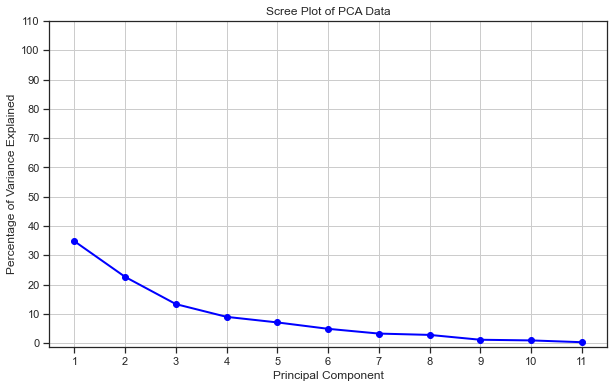

In [13]:
pca=PCA(n_components=11)
pca.fit_transform(x_train)
pca.transform(x_test)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10,6))

plt.plot(PC_values, (pca.explained_variance_ratio_*100), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of PCA Data')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(0, 120, 10))
plt.ylabel('Percentage of Variance Explained')
plt.grid()
plt.show()

In [14]:
pca=PCA(n_components=11)
temp=pca.fit_transform(Extracted_features)
pca.explained_variance_ratio_*100

array([32.0149703 , 23.51849733, 16.19992326,  7.87401559,  6.52166451,
        4.27126791,  3.38010711,  3.08014128,  1.69001529,  1.31571562,
        0.13368181])

Visually, from the Scree Plot, we can see that the first 5 PC components explain up to  32.0 + 23.5 + 16.2 + 7.87 + 6.52 = 86.1% of the variance in the data. That seems to be a good PCA Analysis, as generally the rule of thumb is to pick enough PCs such that they add up to at least 80% of total variance. This way, we can see that reducing the 11 features to 5 will still retain 86% of the variance in the original data.

###  3. You now want to experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier. Produce a plot that shows accuracy of your kNN classifier against number of reduced dimensions being used. The dimensions should listed in increasing order from 2 up to D, the original dimensionality of the dataset. 
### For the kNN classifier, you should choose the best one you found from asg1, one of the weighted versions using a normalized dataset. Comment briefly on the difference in accuracy from asg1.

To do this assessment, we will carry out PCA analysis on a range of different dimensions,  from 2 to 11 (which is the maximum number of features in our current dataset). After each time PCA is carried out with that particular dimension number on the training data, we will use the KNN classifier and note the accuracy on the test data into an array which loops until maximum dimension of 11 is reached.

And then the final graph will be plotted to show us accuracies of the KNN classifier on PCA treated test data for different set dimensions.

From assignment 1, we saw that the best accuracy with KNN on the Wine dataset was with the the Manhattan weighted scheme gave a maximum accuracy of 70% at k=64



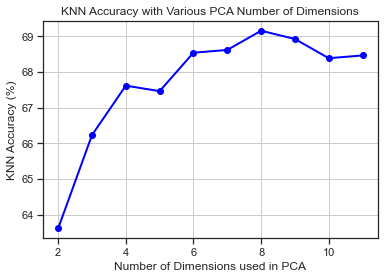

In [15]:
accuracies=[]
pcas=[2,3,4,5,6,7,8,9,10,11]

x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)

for i in range (2,12):

    pca=PCA(n_components=i)      
    knn= KNeighborsClassifier(n_neighbors=64,weights='distance',p=1)
    pca=pca.fit(x_train,y_train)
    knn.fit(pca.transform(x_train),y_train)   
    acc_knn = knn.score(pca.transform(x_test), y_test)
    accuracies.append(acc_knn*100)
        
plt.plot(pcas,accuracies, 'o-', linewidth=2, color='blue')
plt.title('KNN Accuracy with Various PCA Number of Dimensions')
plt.xlabel('Number of Dimensions used in PCA')
plt.ylabel('KNN Accuracy (%)')
plt.grid()
plt.show()

We can see from the plot above that the accuracy is at its peak with 8 dimensions at **69.1%**. After that it, it drops slightly but more or less stays constant.
In conclusion, compared to the best accuracy with KNN in Assignment one, which was **70%**, performing  KNN on a PCA model did not help to increase the accuracy.

### 4. Now run the same analysis as in Question 3 using the LDA method.

Similar to the last question, we will carry out LDA analysis on a range of different dimensions. This time, we will set the maximum dimension to be 6 (not 11) because the maximum LDA dimension can only be up to the minimum between the number of features and (number of classes-1). In this case we have 11 total features but only 7 classes, so we set the maximum to 7-1 = 6.

After each time LDA is carried out with that particular dimension number on the training set, we will use the KNN classifier and note its accuracy with the test set into an array which loops until maximum dimension of 6 is reached.

And then the final graph will be plotted to show us accuracies of the KNN classifier on LDA treated data for different set dimensions.

From assignment 1, we saw that the best accuracy with KNN on the Wine dataset was with the the Manhattan weighted scheme gave a maximum accuracy of 70% at k=64



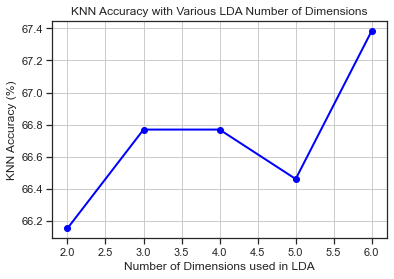

In [16]:
accuracies=[]
ldas=[2,3,4,5,6]
x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)

for i in range (2,7):
    lda=LinearDiscriminantAnalysis(n_components=i)      
    knn= KNeighborsClassifier(n_neighbors=64,weights='distance',p=1)
    lda=lda.fit(x_train,y_train)
    knn.fit(lda.transform(x_train),y_train)   
    acc_knn = knn.score(lda.transform(x_test), y_test)
    accuracies.append(acc_knn*100)
        
plt.plot(ldas,accuracies, 'o-', linewidth=2, color='blue')
plt.title('KNN Accuracy with Various LDA Number of Dimensions')
plt.xlabel('Number of Dimensions used in LDA')
plt.ylabel('KNN Accuracy (%)')
plt.grid()
plt.show()  

We can see from the plot above, that the accuracy reached its peak at the maximum dimension of 6 with an accuracy of around **67.4%**. Compared to the KNN accuracy without reduced dimensions which gave us 70%, there is just a small decrease.

When comparing the best accuracies from the LDA and PCA model, the best accuracy for the wine dataset was with **PCA with 8 dimensions**. 

For further analysis, we will put that in a new dataframe to be used later. 

To do so, we will create an PCA classifier of 8 dimensions, to which we fit the training data and normalize it. We will then transform the test data and normalize it. These train and test sets are concatenated together to get the final PCA_Wine_df DataFrame.

Since the results of the PCA reduction gives us some negative values, we also make sure to normalize it again using min-max normalization

In [17]:
pca=PCA(n_components=8)    

PCA_train=pca.fit(x_train,y_train).transform(x_train)
scalar.fit_transform(PCA_train)
PCA_test=pca.transform(x_test)
scalar.transform(PCA_test)

PCA_Wine_train=pd.DataFrame(data=PCA_train,columns=['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8'])
PCA_Wine_test=pd.DataFrame(data=PCA_test,columns=['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(PCA_Wine_train)
scalar.transform(PCA_Wine_test)

PCA_Wine_df=pd.concat([PCA_Wine_train,PCA_Wine_test])
PCA_Wine_df

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
0,0.542660,0.265466,0.562408,0.516365,0.276193,0.300112,0.372758,0.447319
1,0.213555,0.612053,0.553007,0.422511,0.491504,0.294304,0.519253,0.359665
2,0.473978,0.085074,0.673890,0.519069,0.400685,0.176360,0.333835,0.458259
3,0.487028,0.524706,0.413341,0.393545,0.238356,0.351755,0.318231,0.468413
4,0.563629,0.586098,0.641528,0.473147,0.267245,0.256159,0.341367,0.238302
...,...,...,...,...,...,...,...,...
1295,0.453987,0.546373,0.511401,0.456312,0.173217,0.240849,0.329555,0.392782
1296,0.632122,0.657583,0.621442,0.303021,0.342630,0.252886,0.334632,0.333065
1297,0.204686,0.441798,0.378631,0.516131,0.253599,0.187262,0.661329,0.430903
1298,0.273938,0.535500,0.322789,0.609016,0.273025,0.155826,0.421044,0.302280


# 2 Naive Bayes Classifier

### Now you will classify the two datasets using the Naive Bayes Classifier. There are a number of these available, for our datasets, the Multinomial Naive Bayes and Complement Naive Bayes forms seem most appropriate, so we will experiment with those.

### 1. Use 5-fold cross validation to compare both versions of Naive Bayes against your previous best results from kNN. Do this on all 4 (or 6) of your datasets and produce a table comparing the accuracies.

First, we split our validation set from the Wine PCA dataset that was just created into 5 sets, and each of their accuracies is printed after using the Multinomial Naive Bayes Classifier, as well as their average. We can then predict the accuracy of the test set with the classifier and print its accuracy as well

In [18]:
MultinomialNB()
clf = MultinomialNB()
clf.fit(PCA_Wine_train, target_training_set)
k_fold = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies=(cross_val_score(clf,PCA_Wine_train,target_training_set,cv=k_fold))

print(cross_valid_accuracies)
print (np.mean(cross_valid_accuracies)*100)

clf.fit(PCA_Wine_train, target_training_set)
predictions=clf.predict(PCA_Wine_test)
print(accuracy_score(target_test_set,predictions)*100)


[0.41634615 0.44038462 0.43599615 0.45524543 0.43214629]
43.60237284371067
43.84615384615385


We can see from the above results, the accuracy of the 5 CV folds are : 41.6%, 44.0%, 43.5%, 43.2%, 43.6% and their mean is 43.6%. The accuracy when testing on the test set is **43.8%**. This is much lower than the best result from KNN which gave us 69.1% accuracy

We will now repeat the analysis with the same Multinomial Naive Bayes classifier but with the raw data this time (without reduced dimensions) and extract the same accuracies

In [19]:
MultinomialNB()
clf2 = MultinomialNB()
clf2.fit(x_train, target_training_set)
k_fold2 = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies2=(cross_val_score(clf2,x_train,target_training_set,cv=k_fold2))

print(cross_valid_accuracies2)
print (np.mean(cross_valid_accuracies2)*100)

clf2.fit(x_train, target_training_set)
predictions2=clf2.predict(x_test)
print(accuracy_score(target_test_set,predictions2)*100)

[0.41634615 0.44038462 0.43599615 0.45524543 0.43214629]
43.60237284371067
43.84615384615385


Here, we see the 5 accuracies from the 5-fold Cross Validation are 41.6%, 44.0%, 43.5%, 43.2%, 43.6% and their mean is 43.6%. The accuracy when testing on the test set is **43.8%**. This is much lower than the best result from KNN which gave us 70% accuracy

Comparing between the raw dataset and the PCA reduced dataset, there is no significant difference between their Multinomial Bayes Classification accuracies. 

Now, we repeat the analysis using the Complement Naive Bayes Classifier, starting with the PCA reduced dataset

In [20]:
ComplementNB()
clf3 = ComplementNB()
clf3.fit(PCA_Wine_train, target_training_set)
k_fold3 = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies3=(cross_val_score(clf3,PCA_Wine_train,target_training_set,cv=k_fold3))

print(cross_valid_accuracies3)
print (np.mean(cross_valid_accuracies3)*100)

clf3.fit(PCA_Wine_train, target_training_set)
predictions3=clf3.predict(PCA_Wine_test)
print(accuracy_score(target_test_set,predictions3)*100)

[0.43173077 0.44615385 0.42829644 0.43407122 0.41000962]
43.005238024727916
42.53846153846153


We recieve the 5 validation set accuracies to be 43.2%, 44.7%, 42.8%, 43.4%, 41.0% and their mean as 43.0%. The accuracy of the classifier on the test set will be **42.5%**. This is still much lower than the best KNN accuracy which gave us 69.1% accuracy

Now, we repeat the Complement Naive Bayes Classifier on the raw data:

In [21]:
ComplementNB()
clf4 = ComplementNB()
clf4.fit(x_train, target_training_set)
k_fold4 = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies4=(cross_val_score(clf4,x_train,target_training_set,cv=k_fold4))

print(cross_valid_accuracies4)
print (np.mean(cross_valid_accuracies4)*100)

clf4.fit(x_train, target_training_set)
predictions4=clf4.predict(x_test)
print(accuracy_score(target_test_set,predictions4)*100)

[0.44134615 0.44326923 0.43214629 0.43118383 0.42252166]
43.409343303472276
42.769230769230774


This last analysis shows us the 5 validation set accuracies to be 44.1%, 44.3%, 43.2%, 43.1%, 42.3% and their mean as 43.4%. The accuracy of the classifier on the test set is **42.8%**. This is much lower than the best result from KNN which gave us 70% accuracy

Comparing between Complement Naive Bayes on the raw versus PCA Reduced, there is not much difference in accuracies

In conclusion, when comparing between Complement Naive Bayes and Multinomial Naive Bayes, there is not much of a difference between accuracies in either the raw or PCA reduced data. All the accuracies are lower than the respective KNN classification accuracies


### 2. Complement Naive Bayes is meant to perform better for unbalanced datasets, since our datasets our unbalanced, this seems appropriate, does it make much difference? Try to explain why either way.

Multinomial classification suits best for the discrete values like word counts, while Complement will count the occurrences of a word in the complement to the class. Therefore, complement Naive Bayes accounts for the 'harsh' decisions made by multinomial Naive Bayes which generally makes it better for unbalanced datasets. Upon checking the frequency of the unique classes in our dataset, we can see the dataset is quite imbalanced:

In [22]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

However, we do not see any drastic difference in accuracies between the two Naive Bayes classifiers.

# 3. Decision Trees Classifier

### You will now do classification on your datasets using Decision Trees. Decision Trees have a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.

###  1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset • the maximum depth of trees

Here, we use the GridSearchCV function to search for the best parameter 'Maximum Depth'. The criterea that we use to actually measure the best result among a range of depth options is the Gini Impurity, which measures how 'pure' a class is ie, how many classes exist in the pool of datapoints.

The arbitrary range of tree depth we choose to evaluate is from depth 1 to 15. The code we write checks the accuracy of the train/validation to see what the best parameter value is. First, we do the analysis on the raw data.

In [23]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0)
param_grid = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
DT_result = DT_fit.fit(x_train, y_train)
DT_raw=DT_result.best_estimator_
DT_raw


DecisionTreeClassifier(max_depth=14, max_features='auto', random_state=0)

Now that we see the best depth is 14, we can train a new decision tree with that parameter and test it on the unseen test data and check its accuracy

In [24]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0,max_depth=14)
DTbase.fit(x_train, y_train)
DTbase.score(x_test,y_test)*100

59.38461538461538

We can see the accuracy is **59.4%** when testing the test data on the best paremeter

Now, we repeat the same analysis on the best reduced data which was PCA with 8 dimensions.

In [25]:
DTbase2 = DecisionTreeClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
DT_fit2 = GridSearchCV(estimator=DTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
DT_result2 = DT_fit2.fit(PCA_train, y_train)
DT_PCA=DT_result2.best_estimator_
DT_PCA

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=0)

The best parameter in this case is with a depth of 15, which means the LDA data took more depth to reach its highest accuracy. Moreover, since we only checked dimensions up to 15, this may not accurately explain the trend, since we cannot see if the accuracy would keep increasing as the depth increases. 

Now, we test on the actual unseen test set using the depth of 15 on the PCA fit decision tree, and check the accuracy

In [26]:
DTbase2 = DecisionTreeClassifier(max_features = 'auto', random_state = 0,max_depth=15)
DTbase2.fit(PCA_train, y_train)
DTbase2.score(PCA_test,y_test)

0.5961538461538461

The obtained accuracy is **59.6%** which is about the same as the raw data

So in conclusion, the raw dataset and LDA dataset do not have any significant difference between best parameters, and the accuracies achieved with them.

### 2. Produce a plot showing the mean accuracy above parameter.

Using the decision tree that was created with the raw data earlier, we will plot the accuracies recieved with the training set against the range of max depth options

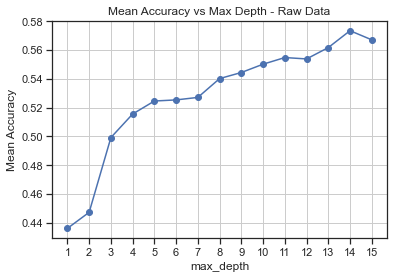

In [27]:
results_df = pd.DataFrame(DT_result.cv_results_)
df1= results_df.loc[results_df['param_criterion'] == 'gini']
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], df1["mean_test_score"], '-o')
plt.title('Mean Accuracy vs Max Depth - Raw Data')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.grid()

We can visually check the graph above to see the best accuracy is around 57% when using a depth of 14 in the decision tree which was confirmed with the best_estimator_ function on the classifier. It is also clear to see that the increase starts at a steep rise. However, past the range we provided, the accuracy would most probably increase at a slow rate until it tapers off to a linear horizontal line.

Now, we repeat the same analysis and plot the graph for the Decision Tree created with the PCA dataset.

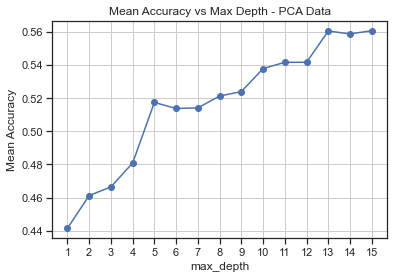

In [28]:
results_df2 = pd.DataFrame(DT_result2.cv_results_)
df2= results_df2.loc[results_df2['param_criterion'] == 'gini']
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], df2["mean_test_score"], '-o')
plt.title('Mean Accuracy vs Max Depth - PCA Data')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.grid()

This time we see the best accuracy is around 56% with a depth of 15. This about the same accuracy as the raw data achieved, with almost the same depth. 

So in conclusion, when comparing the accuracy (measured with Gini Impurity) of the decision tree with respect to the max_depth parameter, it seems that the raw data and PCA data did not have any significant difference.

### 3. Interpretability: Use the decision tree library functions, to examine the finall resulting splitting rules used for the trees. Do they indicate any interesting patterns that explain the data? Can you find support for this from any analysis you've done or see on this dataset previously? For this part, use original raw feature space only.

Using the raw data only, we will plot a decision tree to take a better look at the splitting rules used from the tree. Although we recieved a best depth of 15, it is not feasible to draw and evaluate a tree of that depth in this assignment. Thus, we will only produce a tree of max depth up to 4 for our evaluation

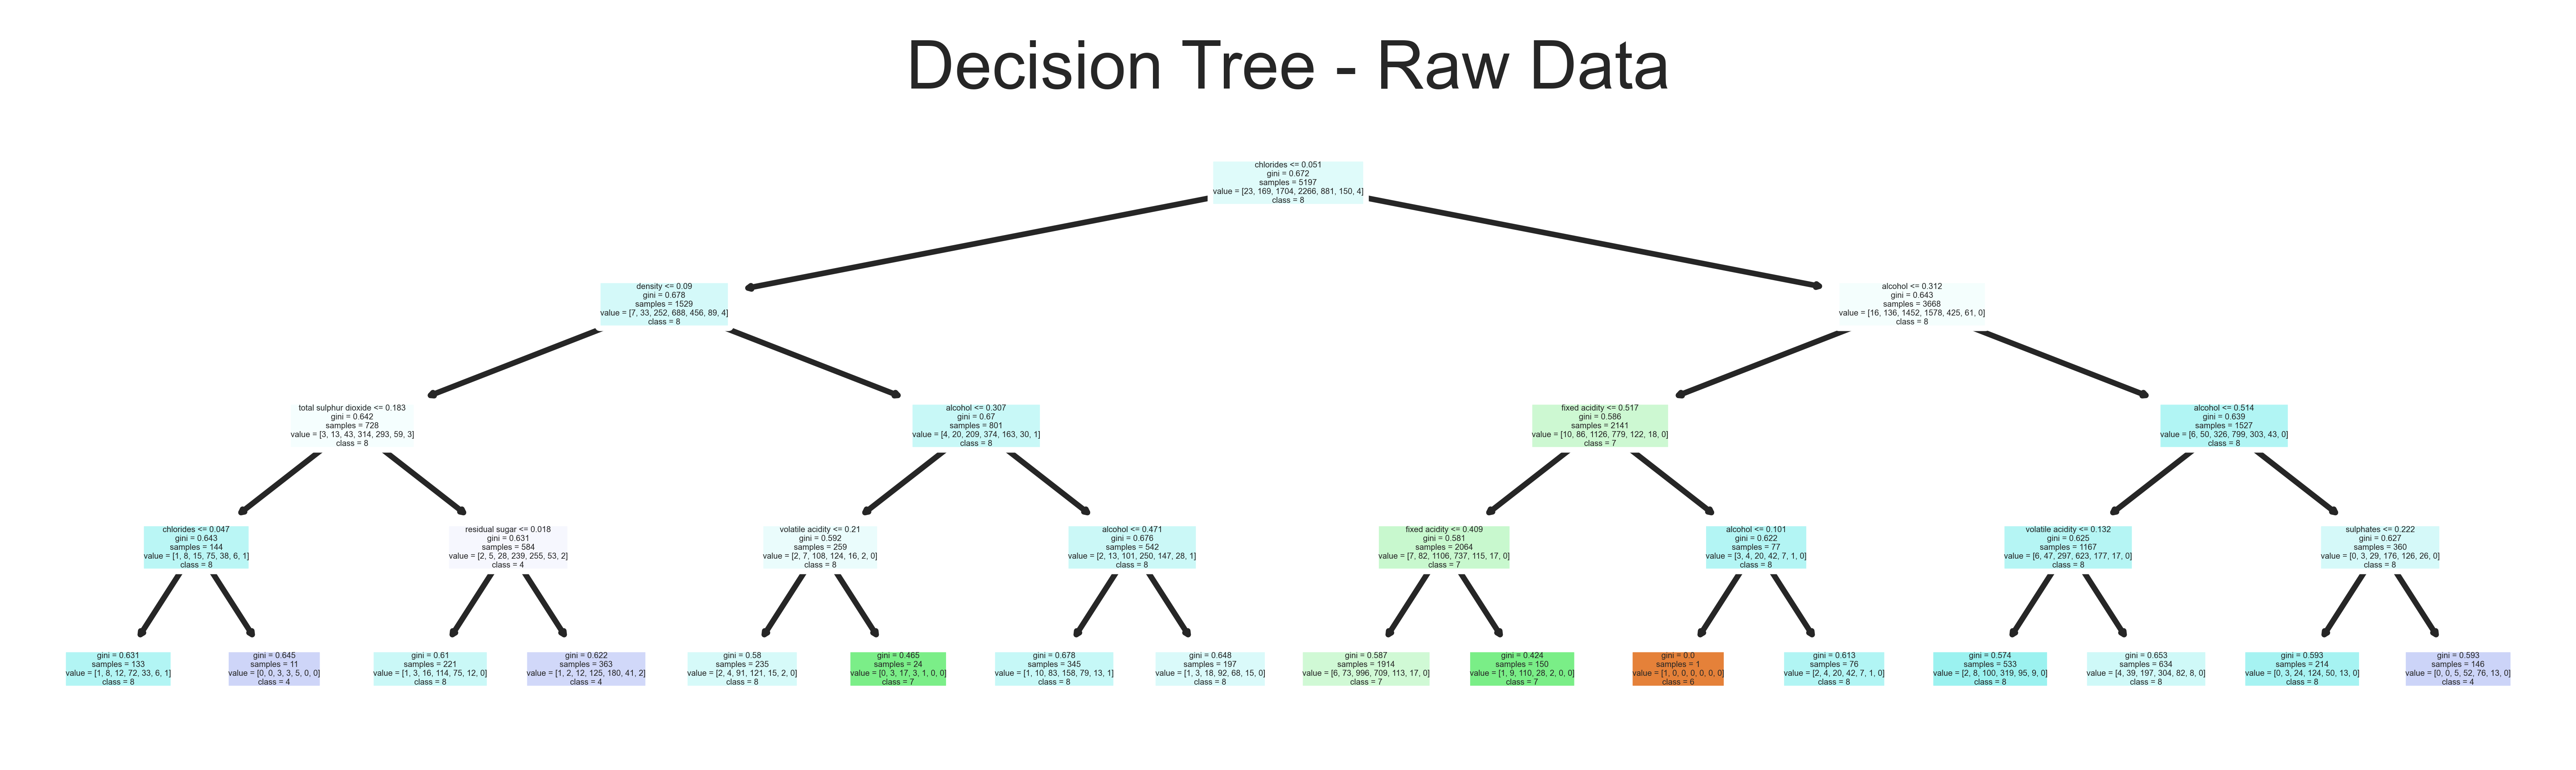

In [29]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0)
param_grid = {'criterion': ['gini'],'max_depth':[1,2,3,4]}
DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
DT_result = DT_fit.fit(x_train, y_train)
DT_raw=DT_result.best_estimator_
fn=['fixed acidity', 'volatile acidity','citric acid',
     'residual sugar','chlorides',
     'free sulfur dioxide','total sulphur dioxide','density','pH','sulphates','alcohol']
cn=['6' ,'5', '7', '8' ,'4' ,'3', '9']
fig2, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,2), dpi=1000)
tree.plot_tree(DT_raw,feature_names=fn, class_names=cn,
                             filled=True, rounded=True)
plt.title('Decision Tree - Raw Data')

fig2.savefig('rf_individualtree.png')

The decision tree above shows us some interesting observations that can be seen with the splitting pattern. A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis. For each split, the Gini Impurity of each child node is individually calculated. The split with the lowest value of Gini Impurity is then selected.

In this specific tree, we can observe that the root node was first split at chlorides at <=0.051 and gini impurity value of 0.672. In the next depth of the tree, we have a left split at *Density* <=0.09( further split into total sulfur dioxide <= 0.183 and alcohol <= 0.307) and a right split at alcohol <=0.312(further split into Fixed acidity <=0.517 and alcohol <=0.514)

The splitting is balanced with equal branching on the right side of root node and left node. This splitting continues similarly until each of the resulting child nodes end up with 2 leafnodes.In the final splitting, the pattern that can be observed is that the final child node splits are either on Chlorides, residual sugar, volatile acidity, alcohol, fixed acidity and sulphates. 

# 4 Random Forest Classifier

### You will now do classifcation on your datasets using Random Forests. Random Forests have a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.

### 1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
### • the maximum depth of trees, you can try values as low as 2 or 3 and as high as needed, decision trees have an upper limit on how deep they can go determine by the size of the dataset.
### • the number of trees, try values at regular intervals, you can go as low as 3 and as high as a few hundred trees.

On the raw and PCA dataset both, we will use 5-fold cross validation to find the best parameters for the maximum depth and the number of trees. 

The range for the maximum depth of trees was chosen to be starting from 10, iterating 100 steps until 410 trees.
We will start with the raw data:

In [30]:
RFbase = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [10, 110,210,310,410],'max_depth': [2,4,6,8,10],}
RF_fit = GridSearchCV(estimator=RFbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
RF_result = RF_fit.fit(x_train, y_train)
RF_results_df = pd.DataFrame(RF_result.cv_results_)
RF_raw=RF_result.best_estimator_
RF_raw

RandomForestClassifier(max_depth=10, n_estimators=310, random_state=0)

We can see the best parameters between the ones we listed were: 310 for the number of trees and 10 for the maximum depth. So, we can test the accuracy on the raw test set of a random forest with those settings

In [31]:
RFbase = RandomForestClassifier(max_features = 'auto', random_state = 0,max_depth=10,n_estimators=310)
RFbase.fit(x_train, y_train)
RFbase.score(x_test,y_test)*100

63.84615384615384

We can see the accuracy when testing on the raw test data with the best parameters gives us **63.8%**.

Now, we will repeat that same analysis with the PCA data

In [32]:
RFbase2 = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [10, 110,210,310,410],'max_depth': [2,4,6,8,10],}
RF_fit2 = GridSearchCV(estimator=RFbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
RF_result2 = RF_fit2.fit(PCA_train, y_train)
RF_PCA=RF_result2.best_estimator_
RF_PCA

RandomForestClassifier(max_depth=10, n_estimators=410, random_state=0)

We can see the best parameters between the ones we listed this time are: 410 for the number of trees and 10 for the maximum depth. Compared to the raw data, the best maximum depth remained the same, but the best number of trees increased from from 310 to 410. 

Now, we can test the accuracy on the PCA test set of a random forest with these settings

In [33]:
RFbase2 = RandomForestClassifier(max_features = 'auto', random_state = 0,max_depth=10,n_estimators=410)
RFbase2.fit(PCA_train, y_train)
RFbase2.score(PCA_test,y_test)*100

63.23076923076923

We can see the accuracy when testing on the PCA test data with the best parameters gives us **63.2%**.

In conclusion, the PCA data gave about the same accuracy as the raw data but that was achieved with a higher number of trees and the same depth.

### 2. Produce a plot showing the mean accuracy above parameter settings. This can be done as a heat plot showing a grid of mean accuracies for different combinations of the two parameters.

We will now take a look at the accuracies achieved from the different range of parameters that we chose from in q1 to get a better idea of the trends. 

First, we will create the heat map of mean accuracies of the random forest on the raw data

[Text(0.5, 12.5, 'Maximum Depth'), Text(30.5, 0.5, 'Number of Trees')]

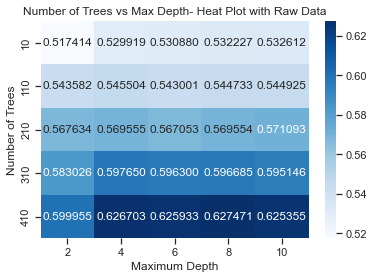

In [34]:
RF_results_df = pd.DataFrame(RF_result.cv_results_)
x_axis_labels = [2,4,6,8,10]
y_axis_labels = [10,110,210,310,410]
data = np.array(RF_results_df["mean_test_score"])
data = data.reshape(5,5)
plt.title('Number of Trees vs Max Depth- Heat Plot with Raw Data')
ax = sns.heatmap(data, annot=True, cmap="Blues",fmt='f',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set(xlabel='Maximum Depth', ylabel='Number of Trees')

From the heatmap above, we can observe the higher accuracies (shown in darker blue) are concentrated towards the bottom right corner, where we have the maximum depth and maximum number of trees. This shows us that both of these parameters have a positive effect on increasing the accuracy of the classifier.

We will now plot the same heat map but with the PCA data now

[Text(0.5, 12.5, 'Maximum Depth'), Text(30.5, 0.5, 'Number of Trees')]

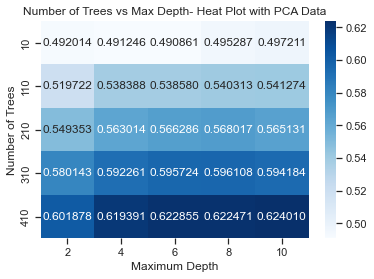

In [35]:
RF_results_df2 = pd.DataFrame(RF_result2.cv_results_)
x_axis_labels = [2,4,6,8,10]
y_axis_labels = [10,110,210,310,410]
data2 = np.array(RF_results_df2["mean_test_score"])
data2 = data2.reshape(5,5)
plt.ylabel('Number of Trees')
plt.xlabel('Maximum Depth')
plt.title('Number of Trees vs Max Depth- Heat Plot with PCA Data')
ax = sns.heatmap(data2, annot=True, cmap="Blues",fmt='f',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set(xlabel='Maximum Depth', ylabel='Number of Trees')

From the heatmap above, we can observe that once again, the higher accuracies (shown in darker blue) are concentrated towards the bottom right corner, where we have the maximum depth and maximum number of trees. This shows us that both of these parameters have a positive effect on increasing the accuracy of the classifier.

# 5. Gradient Tree Boosting

### You will now do classification on your datasets using Gradient Tree Boosting (on sklearn it is GradientBoostingClassifier): This algorithm has a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.



### 1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
### • the number of estimators, try values at regular intervals, you can go as low as 3 and as high as a few hundred estimators.
### Note: the number of `trees' grown by GBT is n classes  x n estimators but this is handled automatically.

On the raw and PCA dataset both, we will use 5-fold cross validation to find the best parameters for the number of estimators 

The range was intially chosen to be starting from 10 until 350 estimators, but it was observed that the best parameter was 10 estimators in that case. So, in order to rule out the reason for that being the algorithm works best for whatever the lowest n_estimator in the range is, we add '5' to our options
We will start with the raw data:

In [36]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [5,10,160,310,350]}
GT_fit = GridSearchCV(estimator=GTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
GT_result = GT_fit.fit(x_train, y_train)
GT_results_df = pd.DataFrame(GT_result.cv_results_)
GT_raw=GT_result.best_estimator_
GT_raw

GradientBoostingClassifier(max_features='auto', n_estimators=350,
                           random_state=0)

We can see the best parameters between the ones we listed was 350 number of estimators. 

Since Gradient Boosted decision trees work in a way that each next tree attempts to model and correct for the errors made by the sequence of previous trees, adding more trees does usually improve the performance of the model, such as in this dataset

Now, we will test the accuracy of this best setting on the test data.

In [37]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0,n_estimators=350)
GTbase.fit(x_train, y_train)
GTbase.score(x_test,y_test)*100

61.53846153846154

We can see the accuracy when testing on the raw test data with the best parameters gives us **61.5%**.

Now, we will repeat that same analysis with the PCA data

In [38]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [5,10,160,310,350]}
GT_fit2 = GridSearchCV(estimator=GTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
GT_result2 = GT_fit2.fit(PCA_train, y_train)
GT_results_df2 = pd.DataFrame(GT_result2.cv_results_)
GT_PCA=GT_result2.best_estimator_
GT_PCA

GradientBoostingClassifier(max_features='auto', n_estimators=350,
                           random_state=0)

Once again, as expected, the best parameter of number of estimators is the highest numbers we provided as the accuracy of the model will keep increasing as estimators are added. 

We proceed to test this 'best' model on the PCA test data to see the accuracy

In [39]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0,n_estimators=350)
GTbase2.fit(PCA_train, y_train)
GTbase2.score(PCA_test,y_test)*100

61.61538461538461

The accuracy obtained here is **61.6%** which is Higher than the Gradient boosted tree classification performed on the raw data. This is becuase dimesnsion reduction extracted only those features which explains the most variance/patterns in the dataset and eliminate the irrelevant feautres.

### 2. Produce a plot showing the mean accuracy above parameter settings. This can be done as a heat plot showing a grid of mean accuracies for different combinations of the two parameters.

Since we only have one parameter in this case that we did a Grid Search on to find the best parameter, it is not possible to do a heat map to explain the trend in accuracy. Instead, we can plot a simple scatter plot to show the trend of accuracy between the range of parameter (number of estimators) that we tested for. These displayed accuracies will be the average of the 5 accuracies on the train/validation set after 5-fold split.

Text(0, 0.5, 'Mean Accuracy')

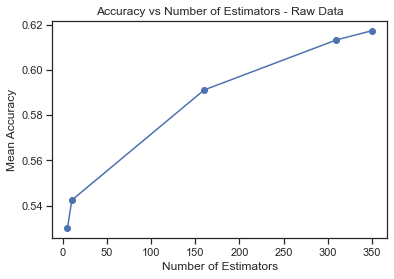

In [40]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [5,10,160,310,350]}
GT_fit = GridSearchCV(estimator=GTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
GT_result = GT_fit.fit(x_train, y_train)
GT_results_df = pd.DataFrame(GT_result.cv_results_)
results_df = pd.DataFrame(GT_result.cv_results_)
x=results_df['param_n_estimators']
y=results_df['mean_test_score']
plt.plot(x,y,'-o')
plt.title('Accuracy vs Number of Estimators - Raw Data')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

As expected, the accuracy increases with the number of estimators. As boosting is one of the ways to improve the accuracy of a decision tree induction. Initially weights are assigned to each of the training tuples. After the classifiers are learned, the weights are updated such that the subsequent classifier gives more attention towards the tuples which were previously missed out. This way. every next tree works to do better on what was not done well by the last tree

We will now repeat this analysis with the PCA Dataset

Text(0, 0.5, 'Mean Accuracy')

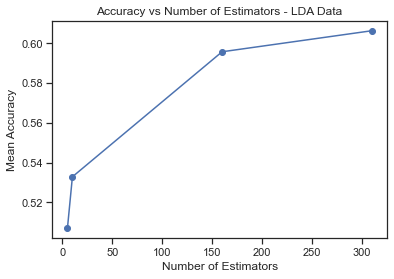

In [41]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [5,10,160,310]}
GT_fit2 = GridSearchCV(estimator=GTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
GT_result2 = GT_fit2.fit(PCA_train, y_train)
GT_results_df2 = pd.DataFrame(GT_result2.cv_results_)
results_df2 = pd.DataFrame(GT_result2.cv_results_)
a=results_df2['param_n_estimators']
b=results_df2['mean_test_score']
plt.plot(a,b,'-o')
plt.title('Accuracy vs Number of Estimators - LDA Data')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

And, again, we see the accuracy increases as the number of estimators increases, since each next estimator is trained to do better on what the last estimator did badly on. 

### References
1. https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063`
2. https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume11/opitz99a-html/node14.html
3. https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
4. https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
5.https://scikitlearn.org/0.16/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py
6. https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
7. https://www.geeksforgeeks.org/naive-bayes-classifiers/
8. https://brainly.in/question/32814833
9. https://corporatefinanceinstitute.com/resources/knowledge/other/decision-tree/